In [1]:
#Code to check see-saw oscillation between Amazon and Congo

import numpy as np
import datetime
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.io import loadmat
import xarray as xr
import math
import h5py
import pandas as pd
import re
from pathlib import Path
import os
from glob import glob 
from os.path import join
import cmocean
from xgcm import Grid
from scipy.interpolate import griddata
import geopandas as gpd
from scipy import interpolate
from scipy.signal import butter, lfilter, freqz
from scipy import signal
import matplotlib.dates as mdates
from pandas.tseries.offsets import Day, BDay
import rioxarray
from shapely.geometry import mapping
import numpy.ma as ma
import cmocean
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint
import importlib
#import ecco_v4_py as ecco
import gsw
#from ecco_v4_py import resample_to_latlon
import cartopy.util as cutil
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import detrend

In [2]:
satsst = xr.open_mfdataset('/efs_ecco/sjarugul/Project_Datasets/NOAA_OISST.nc')

#new_time = pd.date_range(start='1992-01-01', end='2010-12-31', freq='D')

#satsst = satsst.assign_coords(time=new_time)
satsst

<xarray.Dataset> Size: 393MB
Dimensions:  (lon: 120, lat: 80, time: 10227)
Coordinates:
  * lon      (lon) float64 960B 90.12 90.38 90.62 90.88 ... 119.4 119.6 119.9
  * lat      (lat) float64 640B -14.88 -14.62 -14.38 ... 4.375 4.625 4.875
  * time     (time) datetime64[ns] 82kB 1992-01-01 1992-01-02 ... 2019-12-31
Data variables:
    sst      (time, lat, lon) float32 393MB dask.array<chunksize=(10227, 80, 120), meta=np.ndarray>
Attributes:
    history:         FERRET V7.1  21-May-25
    Conventions:     CF-1.6
    dataType:        Grid
    documentation:   http://apdrc.soest.hawaii.edu/datadoc/oisst_avhrr.php
    FERRET_comment:  File written via LAS. Attributes are inherited from orig...

In [3]:
satsss1 = xr.open_mfdataset('/efs_ecco/sjarugul/Project_Datasets/SMAP_Satellite_DailySSS_Indonesia_2015to2025.nc')
satsss = satsss1
satsss

<xarray.Dataset> Size: 161MB
Dimensions:   (lon: 140, lat: 80, time: 3589)
Coordinates:
  * lon       (lon) float32 560B 90.12 90.38 90.62 90.88 ... 124.4 124.6 124.9
  * lat       (lat) float32 320B -14.88 -14.62 -14.38 ... 4.375 4.625 4.875
  * time      (time) datetime64[ns] 29kB 2015-04-01T12:00:00 ... 2025-04-23T1...
Data variables:
    sss_smap  (time, lat, lon) float32 161MB dask.array<chunksize=(1197, 27, 47), meta=np.ndarray>

In [4]:
eccor5 = xr.open_mfdataset('/efs_ecco/ascherer/datasets/v4r5/surface_sal_temp_fw_daily_latlon_0-20S_100-120E.nc')
eccor5

<xarray.Dataset> Size: 49MB
Dimensions:                  (time: 10226, lat: 20, lon: 20)
Coordinates:
  * time                     (time) datetime64[ns] 82kB 1992-01-01T18:00:00 ....
  * lat                      (lat) float64 160B -19.5 -18.5 -17.5 ... -1.5 -0.5
  * lon                      (lon) float64 160B 100.5 101.5 ... 118.5 119.5
Data variables:
    surface_freshwater_flux  (time, lat, lon) float32 16MB dask.array<chunksize=(10226, 20, 20), meta=np.ndarray>
    sea_surface_temperature  (time, lat, lon) float32 16MB dask.array<chunksize=(10226, 20, 20), meta=np.ndarray>
    sea_surface_salinity     (time, lat, lon) float32 16MB dask.array<chunksize=(10226, 20, 20), meta=np.ndarray>
Attributes:
    comment:                Net freshwater flux into the ocean including cont...
    coverage_content_type:  modelResult
    direction:              >0 decreases salinity (SALT)
    long_name:              Net freshwater flux into the ocean
    standard_name:          water_flux_into_sea_water
    units:                  kg m-2 s-1
    valid_max:              0.01180837769061327
    valid_min:              -0.0032738447189331055

In [5]:
eccor4 = xr.open_mfdataset('/efs_ecco/ascherer/datasets/v4r4/surface_sal_temp_fw_monthly_latlon_10N-20S_90E-120E.nc')
eccor4

<xarray.Dataset> Size: 3MB
Dimensions:                  (time: 312, lat: 30, lon: 30)
Coordinates:
  * time                     (time) datetime64[ns] 2kB 1992-01-16T18:00:00 .....
  * lat                      (lat) float64 240B -19.5 -18.5 -17.5 ... 8.5 9.5
  * lon                      (lon) float64 240B 90.5 91.5 92.5 ... 118.5 119.5
Data variables:
    surface_freshwater_flux  (time, lat, lon) float32 1MB dask.array<chunksize=(312, 30, 30), meta=np.ndarray>
    sea_surface_temperature  (time, lat, lon) float32 1MB dask.array<chunksize=(312, 30, 30), meta=np.ndarray>
    sea_surface_salinity     (time, lat, lon) float32 1MB dask.array<chunksize=(312, 30, 30), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            f07693e6-4181-11eb-beb3-0cc47a3f44ff

In [6]:
ecco4wnd1 = xr.open_mfdataset('/efs_ecco/ascherer/datasets/v4r4/stress_monthly_1992-01-01-2018-01-01.nc')
ecco4wnd1

<xarray.Dataset> Size: 531MB
Dimensions:    (time: 312, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2,
                nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2kB 1992-01-16T18:00:00 ... 2017-12-16T0...
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 5kB dask.array<chunksize=(312, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    EXFtaux    (time, tile, j, i) float32 131MB dask.array<chunksize=(156, 7, 45, 45), meta=np.ndarray>
    EXFtauy    (time, tile, j, i) float32 131MB dask.array<chunksize=(156, 7, 45, 45), meta=np.ndarray>
    oceTAUX    (time, tile, j, i_g) float32 131MB dask.array<chunksize=(156, 7, 45, 45), meta=np.ndarray>
    oceTAUY    (time, tile, j_g, i) float32 131MB dask.array<chunksize=(156, 7, 45, 45), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Ocean and Sea-Ice Surface Stress - Mon...
    uuid:                         ab52a2ac-400d-11eb-8bfd-0cc47a3f49c3

In [7]:
#Select for box 105-115E -12-8S
ecco4_tauu_box = ecco4wnd1.oceTAUX.sel(tile=4,i_g=slice(52,62),j=slice(57,62)).mean('i_g').mean('j')#.squeeze(drop=True)
ecco4_tauv_box = ecco4wnd1.oceTAUY.sel(tile=4,i=slice(52,62),j_g=slice(57,62)).mean('i').mean('j_g')#.squeeze(drop=True)
ecco4_taumag_box = np.sqrt(ecco4_tauu_box**2 + ecco4_tauv_box**2)

ecco4_tauu_box_anom = ecco4_tauu_box.groupby('time.month')-ecco4_tauu_box.groupby('time.month').mean('time')
ecco4_tauv_box_anom = ecco4_tauv_box.groupby('time.month')-ecco4_tauv_box.groupby('time.month').mean('time')
ecco4_taumag_box_anom = ecco4_taumag_box.groupby('time.month')-ecco4_taumag_box.groupby('time.month').mean('time')

ecco4_taumag_box_anom

<xarray.DataArray (time: 312)> Size: 1kB
dask.array<sub, shape=(312,), dtype=float32, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
    tile     (time) int32 1kB 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
  * time     (time) datetime64[ns] 2kB 1992-01-16T18:00:00 ... 2017-12-16T06:...
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [8]:
# Read Heat Flux forcing data

ecco4htflux = xr.open_mfdataset('/efs_ecco/ascherer/datasets/v4r4/heat_flux_monthly_1992-01-01-2018-01-01.nc')
ecco4htflux

ecco4_hflux_box = ecco4htflux.oceQnet.sel(tile=4,i=slice(52,62),j=slice(57,62)).mean('i').mean('j')#.squeeze(drop=True)

ecco4_hflux_box_anom = ecco4_hflux_box.groupby('time.month')-ecco4_hflux_box.groupby('time.month').mean('time')
ecco4_hflux_box_anom

<xarray.DataArray 'oceQnet' (time: 312)> Size: 1kB
dask.array<sub, shape=(312,), dtype=float32, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
    tile     (time) int32 1kB 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
  * time     (time) datetime64[ns] 2kB 1992-01-16T18:00:00 ... 2017-12-16T06:...
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

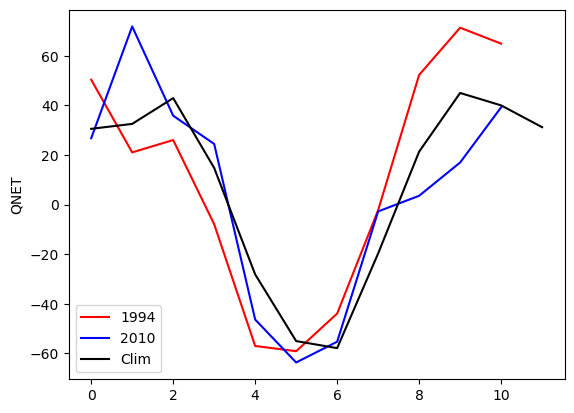

In [9]:
plt.plot(ecco4_hflux_box.sel(time=slice('1994-01-01','1994-12-01')),'-r',label='1994')
plt.plot(ecco4_hflux_box.sel(time=slice('2010-01-01','2010-12-01')),'-b',label='2010')

plt.plot(ecco4_hflux_box.groupby('time.month').mean('time'),'-k',label='Clim')
plt.ylabel('QNET')
plt.legend(loc="lower left")

In [10]:
# Select SST and SSS for box region - 106-112E 7-9S

satsstbox = satsst.sst.sel(lon=slice(105,115),lat=slice(-12,-8)).mean('lat').mean('lon')
eccor5box = eccor5.sel(lon=slice(105,115),lat=slice(-12,-8)).mean('lat').mean('lon')
satsssbox = satsss.sss_smap.sel(lon=slice(105,115),lat=slice(-12,-8)).mean('lat').mean('lon')
eccor4box = eccor4.sel(lon=slice(105,115),lat=slice(-12,-8)).mean('lat').mean('lon')


In [11]:
# Remove seasonal cycle and plot interannual anomalies

satsstbox_anom = satsstbox.groupby('time.dayofyear')-satsstbox.groupby('time.dayofyear').mean('time')
satsssbox_anom = satsssbox.groupby('time.dayofyear')-satsssbox.groupby('time.dayofyear').mean('time')
eccor5box_anom = eccor5box.groupby('time.dayofyear')-eccor5box.groupby('time.dayofyear').mean('time')
eccor4box_anom = eccor4box.groupby('time.month')-eccor4box.groupby('time.month').mean('time')


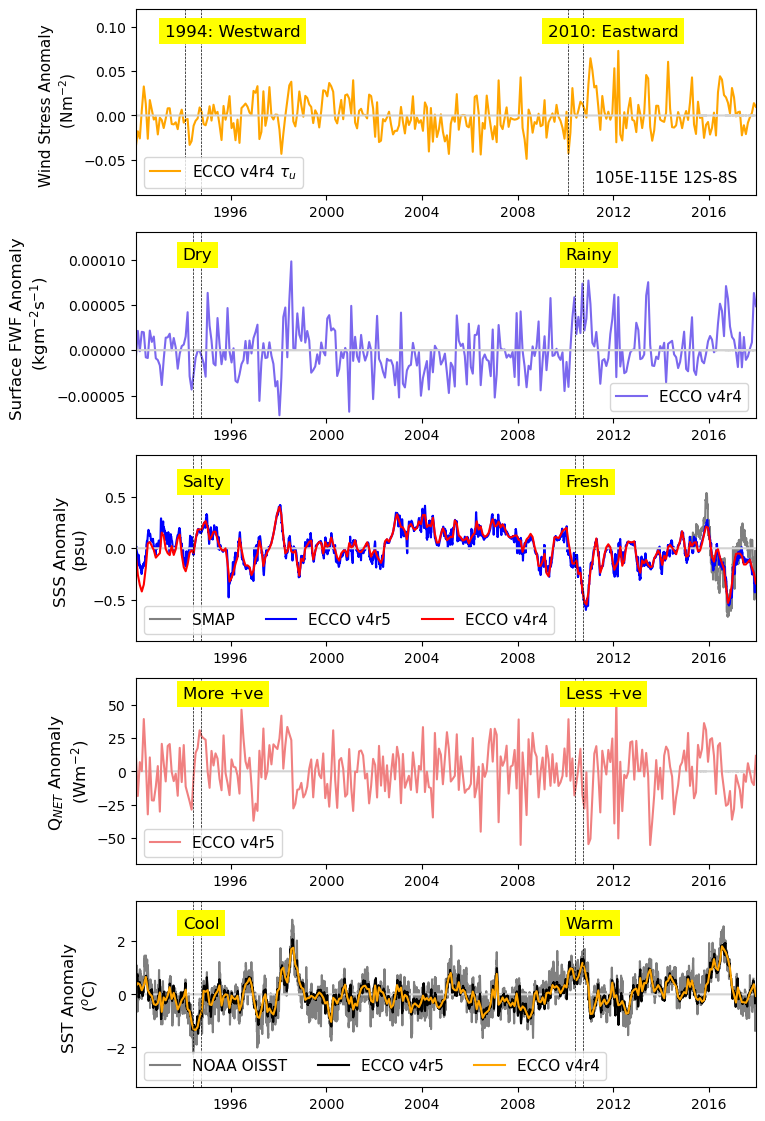

In [12]:
# Plot time series of SST and SSS for box

fig,ax = plt.subplots(5,1,figsize=(8,14))

ax1=ax[0]

#ax1.plot(ecco4_tauv_box_anom.time,ecco4_tauv_box_anom,color='lightblue',label='ECCO v4r4 $\\tau_{v}$')
ax1.plot(ecco4_tauu_box_anom.time,ecco4_tauu_box_anom,color='orange',label='ECCO v4r4 $\\tau_{u}$')
ax1.plot(satsstbox_anom.time,satsstbox_anom*0,color='lightgray')

ax1.axvline(pd.Timestamp('2010-02-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('2010-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.axvline(pd.Timestamp('1994-02-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('1994-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.set_xlim(eccor4box_anom.time[0],eccor4box_anom.time[-1])
ax1.set_ylim([-0.09,0.12]);

ax1.set_ylabel('Wind Stress Anomaly \n (Nm$^{-2}$)',size=11)
ax1.legend(loc="lower left",ncol=4,fontsize=11)
ax1.text(pd.Timestamp('1993-04-01'), 0.09, '1994: Westward',size=12,color='k',bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})
ax1.text(pd.Timestamp('2009-04-01'), 0.09, '2010: Eastward',size=12,color='k',bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})

ax1.text(pd.Timestamp('2011-04-01'), -0.075, '105E-115E 12S-8S',size=11)

ax1=ax[1]

ax1.plot(satsstbox_anom.time,satsstbox_anom*0,color='lightgray')
#ax1.plot(satsssbox_anom.time,satsssbox_anom,color='gray',label='SMAP SSS Anomaly')
#ax1.plot(eccor5box_anom.time,eccor5box_anom.surface_freshwater_flux,color='lightblue',label='ECCO v4r5')
ax1.plot(eccor4box_anom.time,eccor4box_anom.surface_freshwater_flux,color='mediumslateblue',label='ECCO v4r4')
ax1.plot(satsstbox_anom.time,satsstbox_anom*0,color='lightgray')

ax1.axvline(pd.Timestamp('2010-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('2010-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.axvline(pd.Timestamp('1994-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('1994-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.set_xlim(eccor4box_anom.time[0],eccor4box_anom.time[-1])
ax1.set_ylim([-7.5E-5,13E-5]);

ax1.set_ylabel('Surface FWF Anomaly \n (kgm$^{-2}$s$^{-1}$)',size=12)
ax1.legend(loc="lower right",ncol=4,fontsize=11)
ax1.text(pd.Timestamp('1994-01-01'), 0.0001, 'Dry',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})
ax1.text(pd.Timestamp('2010-01-01'), 0.0001, 'Rainy',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})

#ax1.text(pd.Timestamp('2014-02-01'), -0.00006, 'Box: 105E-115E 12S-8S',size=11)


ax1=ax[2]

ax1.plot(satsssbox_anom.time,satsssbox_anom,color='gray',label='SMAP')
ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_salinity,color='blue',label='ECCO v4r5')
ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_temperature*0,color='lightgray')

ax1.plot(eccor4box_anom.time,eccor4box_anom.sea_surface_salinity,color='red',label='ECCO v4r4')

ax1.axvline(pd.Timestamp('2010-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('2010-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.axvline(pd.Timestamp('1994-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('1994-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.set_xlim(eccor4box_anom.time[0],eccor4box_anom.time[-1])
ax1.set_ylim([-0.9,0.9]);

ax1.set_ylabel('SSS Anomaly \n(psu)',size=12)
ax1.legend(loc="lower left",ncol=4,fontsize=11)
ax1.text(pd.Timestamp('1994-01-01'), 0.6, 'Salty',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})
ax1.text(pd.Timestamp('2010-01-01'), 0.6, 'Fresh',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})

ax1=ax[3]

ax1.plot(satsstbox_anom.time,satsstbox_anom*0,color='lightgray')

ax1.plot(ecco4_hflux_box_anom.time,ecco4_hflux_box_anom,color='lightcoral',label='ECCO v4r5')

#ax1.plot(eccor4box_anom.time,eccor4box_anom.sea_surface_temperature,color='orange',label='ECCO v4r4')

ax1.axvline(pd.Timestamp('2010-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('2010-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.axvline(pd.Timestamp('1994-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('1994-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.text(pd.Timestamp('1994-01-01'), 55, 'More +ve',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})
ax1.text(pd.Timestamp('2010-01-01'), 55, 'Less +ve',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})
#ax1.text(pd.Timestamp('2014-08-01'), -2.6, 'Box: 105E-115E 12S-8S',size=10)

ax1.set_xlim(eccor4box_anom.time[0],eccor4box_anom.time[-1])
ax1.set_ylim([-70,70]);
ax1.set_ylabel('Q$_{NET}$ Anomaly \n(Wm$^{-2}$)',size=12)
ax1.legend(loc="lower left",ncol=4,fontsize=11)


ax1=ax[4]

ax1.plot(satsstbox_anom.time,satsstbox_anom,color='gray',label='NOAA OISST')
ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_temperature*0,color='lightgray')

ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_temperature,'-k',label='ECCO v4r5')

ax1.plot(eccor4box_anom.time,eccor4box_anom.sea_surface_temperature,color='orange',label='ECCO v4r4')

ax1.axvline(pd.Timestamp('2010-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('2010-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.axvline(pd.Timestamp('1994-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('1994-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.text(pd.Timestamp('1994-01-01'), 2.5, 'Cool',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})
ax1.text(pd.Timestamp('2010-01-01'), 2.5, 'Warm',size=12,bbox={
        'edgecolor': 'none','facecolor': 'yellow', 'alpha': 1})
#ax1.text(pd.Timestamp('2014-08-01'), -2.6, 'Box: 105E-115E 12S-8S',size=10)

ax1.set_xlim(eccor4box_anom.time[0],eccor4box_anom.time[-1])
ax1.set_ylim([-3.5,3.5]);
ax1.set_ylabel('SST Anomaly \n($^o$C)',size=12)
ax1.legend(loc="lower left",ncol=4,fontsize=11)



#ax1.text(pd.Timestamp('2014-08-01'), -0.8, 'Box: 105E-115E 12S-8S',size=10)
         
#plt.savefig('/efs_ecco/sjarugul/Figures/Nonseasonal_All_Timeseries_ECCO_Satellite_Comparison.png', bbox_inches='tight',dpi=300)


Text(2014-08-01 00:00:00, -0.8, 'Box: 105E-115E 12S-8S')

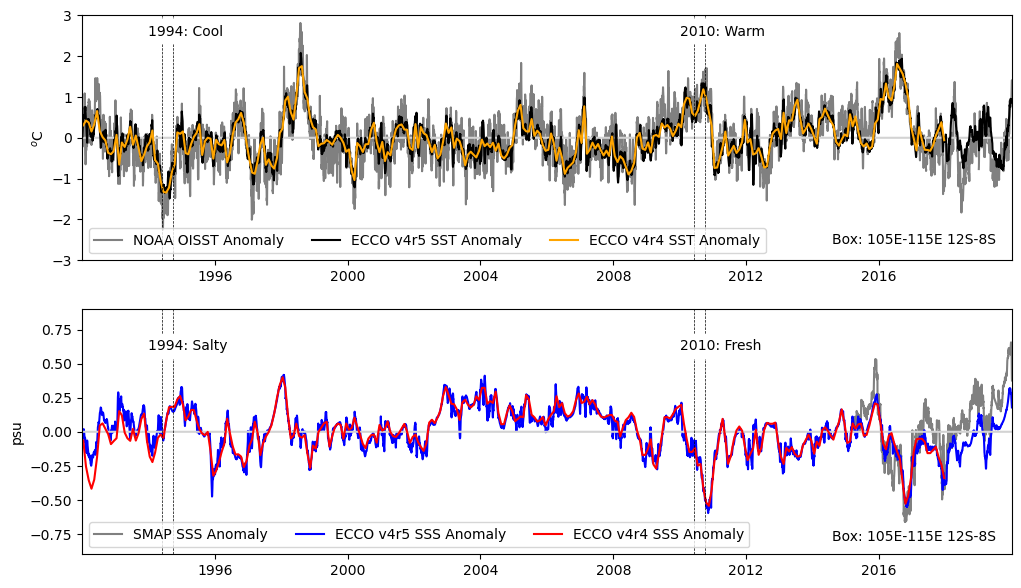

In [13]:
# Plot time series of SST and SSS for box

fig,ax = plt.subplots(2,1,figsize=(12,7))

ax1=ax[0]

ax1.plot(satsstbox_anom.time,satsstbox_anom,color='gray',label='NOAA OISST Anomaly')
ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_temperature*0,color='lightgray')

ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_temperature,'-k',label='ECCO v4r5 SST Anomaly')

ax1.plot(eccor4box_anom.time,eccor4box_anom.sea_surface_temperature,color='orange',label='ECCO v4r4 SST Anomaly')

ax1.axvline(pd.Timestamp('2010-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('2010-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.axvline(pd.Timestamp('1994-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('1994-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.text(pd.Timestamp('1994-01-01'), 2.5, '1994: Cool',size=10,bbox={
        'edgecolor': 'none','facecolor': 'white', 'alpha': 1})
ax1.text(pd.Timestamp('2010-01-01'), 2.5, '2010: Warm',size=10,bbox={
        'edgecolor': 'none','facecolor': 'white', 'alpha': 1})
ax1.text(pd.Timestamp('2014-08-01'), -2.6, 'Box: 105E-115E 12S-8S',size=10)

ax1.set_xlim(eccor5box_anom.time[0],eccor5box_anom.time[-1])
ax1.set_ylim([-3,3]);
ax1.set_ylabel('$^o$C')
ax1.legend(loc="lower left",ncol=4)


ax1=ax[1]

ax1.plot(satsssbox_anom.time,satsssbox_anom,color='gray',label='SMAP SSS Anomaly')
ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_salinity,color='blue',label='ECCO v4r5 SSS Anomaly')
ax1.plot(eccor5box_anom.time,eccor5box_anom.sea_surface_temperature*0,color='lightgray')

ax1.plot(eccor4box_anom.time,eccor4box_anom.sea_surface_salinity,color='red',label='ECCO v4r4 SSS Anomaly')

ax1.axvline(pd.Timestamp('2010-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('2010-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.axvline(pd.Timestamp('1994-06-01'), color='k', linestyle='--', linewidth=0.5)
ax1.axvline(pd.Timestamp('1994-10-01'), color='k', linestyle='--', linewidth=0.5)

ax1.set_xlim(eccor5box_anom.time[0],eccor5box_anom.time[-1])
ax1.set_ylim([-0.9,0.9]);

ax1.set_ylabel('psu')
ax1.legend(loc="lower left",ncol=4)
ax1.text(pd.Timestamp('1994-01-01'), 0.6, '1994: Salty',size=10,bbox={
        'edgecolor': 'none','facecolor': 'white', 'alpha': 1})
ax1.text(pd.Timestamp('2010-01-01'), 0.6, '2010: Fresh',size=10,bbox={
        'edgecolor': 'none','facecolor': 'white', 'alpha': 1})

ax1.text(pd.Timestamp('2014-08-01'), -0.8, 'Box: 105E-115E 12S-8S',size=10)
         
#plt.savefig('/efs_ecco/sjarugul/Figures/Nonseasonal_SST_SSS_Timeseries_ECCO_Satellite_Comparison.png', bbox_inches='tight',dpi=300)
